In [166]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
cola = pd.read_excel(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Time Series\CocaCola_Sales_Rawdata.xlsx')

In [168]:
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [169]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


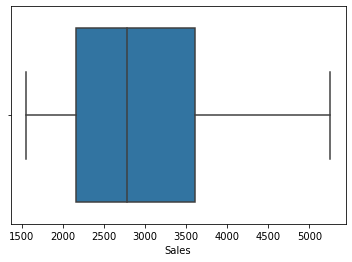

In [170]:
sns.boxplot('Sales',data=cola)

In [171]:
quarter = ['Q1','Q2','Q3','Q4']

In [172]:
q = cola['Quarter'][0]
q[0:2]

'Q1'

In [173]:
cola['quarter'] = 0

In [174]:
for i in range(42):
    q = cola['Quarter'][i]
    cola['quarter'][i] = q[0:2]

C:\Users\abhis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abhis\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [175]:
cola.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [176]:
Dummy_Q = pd.DataFrame(pd.get_dummies(cola['quarter']))

In [177]:
New_cola = pd.concat([cola,Dummy_Q],axis = 1)

In [178]:
New_cola.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [179]:
t = np.arange(0,42)    

In [180]:
New_cola['t'] = t

In [181]:
New_cola['t_squared'] = New_cola['t'] * New_cola['t']

In [182]:
New_cola.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16


In [183]:
New_cola['log_sales']= np.log(New_cola['Sales'])

In [184]:
print(New_cola.head())

  Quarter        Sales quarter  Q1  Q2  Q3  Q4  t  t_squared  log_sales
0   Q1_86  1734.827000      Q1   1   0   0   0  0          0   7.458663
1   Q2_86  2244.960999      Q2   0   1   0   0  1          1   7.716443
2   Q3_86  2533.804993      Q3   0   0   1   0  2          4   7.837477
3   Q4_86  2154.962997      Q4   0   0   0   1  3          9   7.675529
4   Q1_87  1547.818996      Q1   1   0   0   0  4         16   7.344602


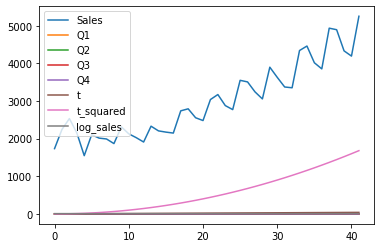

In [185]:
New_cola.plot()

In [103]:
#New_cola.to_csv('New_pred.csv',index=False)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
train,test = train_test_split(New_cola,test_size=0.1,random_state=42)

In [106]:
print('Train Data: \n\n',train)
print('\n Test Data: \n\n',test)

Train Data: 

    Quarter        Sales quarter  Q1  Q2  Q3  Q4   t  t_squared  log_sales
39   Q4_95  4333.000000      Q4   0   0   0   1  39       1521   8.374015
19   Q4_90  2556.009995      Q4   0   0   0   1  19        361   7.846203
29   Q2_93  3899.000000      Q2   0   1   0   0  29        841   8.268475
30   Q3_93  3629.000000      Q3   0   0   1   0  30        900   8.196712
6    Q3_87  2014.362999      Q3   0   0   1   0   6         36   7.608058
27   Q4_92  3243.859993      Q4   0   0   0   1  27        729   8.084519
12   Q1_89  1910.603996      Q1   1   0   0   0  12        144   7.555175
17   Q2_90  2739.307999      Q2   0   1   0   0  17        289   7.915461
9    Q2_88  2313.631996      Q2   0   1   0   0   9         81   7.746574
15   Q4_89  2173.967995      Q4   0   0   0   1  15        225   7.684309
33   Q2_94  4342.000000      Q2   0   1   0   0  33       1089   8.376090
16   Q1_90  2148.278000      Q1   1   0   0   0  16        256   7.672422
36   Q1_95  3854.000000

In [107]:
import statsmodels.formula.api as smf

In [108]:
# Linear model

linear = smf.ols('Sales~t',data=train).fit()

In [109]:
pred_linear = pd.Series(linear.predict(test['t']))
print('Predicted Value :\n\n',pred_linear)

Predicted Value :

 25    3323.976095
13    2464.235187
8     2106.009809
26    3395.621171
4     1819.429506
dtype: float64


In [110]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
print('\nRMSE Value :', rmse_linear)


RMSE Value : 205.59460284749542


In [111]:
# Exponential model

Exponential = smf.ols('log_sales~t',train).fit()

In [112]:
pred_exponential = Exponential.predict(test['t'])
print('Predicted Value :\n\n',pred_exponential)

Predicted Value :

 25    8.063403
13    7.785077
8     7.669108
26    8.086597
4     7.576333
dtype: float64


In [113]:
rmse_exponential = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exponential)))**2))
print('RMSE Value :',rmse_exponential)

RMSE Value : 299.47159168548944


In [114]:
# Quadratic model

quadratic = smf.ols('Sales~t+t_squared',train).fit()

In [115]:
pred_quadratic = quadratic.predict(test[['t','t_squared']])
print('Predicted Value :\n\n',pred_quadratic)

Predicted Value :

 25    3059.909209
13    2282.077508
8     2125.751617
26    3150.387558
4     2071.746710
dtype: float64


In [116]:
rmse_quadratic = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quadratic))**2))
print('RMSE Value :',rmse_quadratic)

RMSE Value : 377.06264543951374


In [117]:
# Additive Seasonality
 
Additive_seasonality = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()

In [118]:
pred_additive = Additive_seasonality.predict(test[['Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_additive)

Predicted Value:

25    3430.203998
13    3430.203998
8     2833.631444
26    3092.545331
4     2833.631444
dtype: float64


In [119]:
rmse_additive = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive))**2))
print('RMSE Value :',rmse_additive)

RMSE Value : 892.0281846795668


In [120]:
# Additive seasonality with linear trend.

Additive_linear_seasonality = smf.ols('Sales~t+Q1+Q2+Q3+Q4',train).fit()

In [121]:
pred_ALS = Additive_linear_seasonality.predict(test[['t','Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_ALS)

Predicted Value:

25    3690.014770
13    2813.153414
8     1729.435662
26    3579.690529
4     1437.148544
dtype: float64


In [122]:
rmse_ALS = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_ALS))**2))
print('RMSE :',rmse_ALS)

RMSE : 240.33169498816045


In [123]:
# Additive seasonality with Quadratic trend.

Additive_quadratic_seasonality = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',train).fit()

In [124]:
pred_AQS = Additive_quadratic_seasonality.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_AQS)

Predicted Value:

25    3387.676653
13    2584.580339
8     1755.391815
26    3371.377053
4     1674.149700
dtype: float64


In [125]:
rmse_AQS = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_AQS))**2))
print('RMSE :',rmse_AQS)

RMSE : 166.19967833728654


In [126]:
# Multiplicative seasonality

mulplicative_seasonality = smf.ols('log_sales~Q1+Q2+Q3+Q4',train).fit()

In [127]:
pred_MS = mulplicative_seasonality.predict(test[['Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_MS)

Predicted Value:

25    8.085017
13    8.085017
8     7.907827
26    7.988951
4     7.907827
dtype: float64


In [128]:
rmse_MS = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_MS)))**2))
print('RMSE :',rmse_MS)

RMSE : 816.5828501493063


In [129]:
# Multiplicative seasonality with linear trend

mulplicative_linear_seasonality = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',train).fit()

In [130]:
pred_MLS = mulplicative_linear_seasonality.predict(test[['t','Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_MLS)

Predicted Value:

25    8.169125
13    7.885261
8     7.550369
26    8.146653
4     7.455748
dtype: float64


In [131]:
rmse_MLS = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_MLS)))**2))
print('RMSE :',rmse_MLS)

RMSE : 169.94664269792275


In [132]:
# Multiplicative seasonality with quadratic trend

mulplicative_quadratic_seasonality = smf.ols('log_sales~t+t_squared+Q1+Q2+Q3+Q4',train).fit()

In [133]:
pred_MQS = mulplicative_quadratic_seasonality.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']])
print('Predicted Value:\n')
print(pred_MQS)

Predicted Value:

25    8.104757
13    7.836598
8     7.555895
26    8.102303
4     7.506205
dtype: float64


In [134]:
rmse_MQS = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_MQS)))**2))
print('RMSE :',rmse_MQS)

RMSE : 207.66946741448976


In [135]:
# Tabulating the rmse values

df = {'Model':pd.Series(['rmse_linear','rmse_exponential','rmse_quadratic','rmse_additive','rmse_ALS','rmse_AQS','rmse_MS','rmse_MLS','rmse_MQS'])
                         ,'Values':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive,rmse_ALS,rmse_AQS,rmse_MS,rmse_MLS,rmse_MQS])}


In [136]:
RMSE_table = pd.DataFrame(df)

In [137]:
RMSE_table

,Model,Values
0,rmse_linear,205.594603
1,rmse_exponential,299.471592
2,rmse_quadratic,377.062645
3,rmse_additive,892.028185
4,rmse_ALS,240.331695
5,rmse_AQS,166.199678
6,rmse_MS,816.582850
7,rmse_MLS,169.946643
8,rmse_MQS,207.669467


In [55]:
# Finish timeseries assignment.
# Complete text mining assignment and learn sentiment analysis.

In [74]:
cola_pred = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Machine Learning - ExcelR\9. Time Series\New_pred.csv')

In [191]:
CocaCola_TS = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=New_cola).fit()
pred= pd.Series(CocaCola_TS.predict(cola_pred))
print(pred)

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64


In [209]:
CocaCola_TS

In [161]:
cola_pred['forecasted_Sales'] = pd.Series(pred)
cola_pred.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,0,0,7.458663,1626.592727
1,Q2_86,2244.960999,Q2,0,1,0,0,1,1,7.716443,2268.402339
2,Q3_86,2533.804993,Q3,0,0,1,0,2,4,7.837477,2189.685821
3,Q4_86,2154.962997,Q4,0,0,0,1,3,9,7.675529,1867.242917
4,Q1_87,1547.818996,Q1,1,0,0,0,4,16,7.344602,1658.311143


<Figure size 720x576 with 0 Axes>

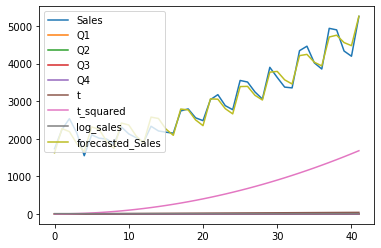

In [212]:
plt.figure(figsize=(10,8))
cola_pred.plot()
